In [1]:
import torch
import torch.nn.functional as F
from matplotlib import pyplot as plt
import module.wavenetmini as wvm

# data
data_path = 'data/'
words = open(data_path + 'names.txt','r').read().splitlines()

print(f'Number of words in dataset: {len(words)}')

# Char to index map:
chars = list(set(''.join(words)))
chars = ['.'] + chars
char_index_map = {s:i for i, s in enumerate(chars)}


import random
random.seed(42)
random.shuffle(words)

n1 = int(0.8*len(words))

block_size = 8
Xtr, Ytr = wvm.get_training_data(words[:n1], char_index_map, block_size)
Xv, Yv = wvm.get_training_data(words[n1:], char_index_map, block_size)

Number of words in dataset: 32033


In [2]:
Xtr.shape

torch.Size([182625, 8])

In [3]:
model = wvm.WaveNetMini(char_index_map, chars, block_size=block_size, emb_dim = 10, hidden_layer_size = 200, neighbour_number = 2)

In [4]:
for c in chars[1:]:
    s = model.predict(f'.......{c}')
    print(f'Name starting with {c}: {s}')

Name starting with g: .......gmccohphqhgwwyttsbixdejjsuav.
Name starting with q: .......qtky.
Name starting with t: .......txvvxdrxcjsgmtb.
Name starting with e: .......ejvonbpjsxngmoeej.
Name starting with m: .......mvjvfbybfqgjpcgbatqpkfsulyhqgwaagasrwvawjnjfbflxkxtdtlpg.
Name starting with i: .......iobvdmmglnbhq.
Name starting with l: .......lcvyoaograuaahaa.
Name starting with n: .......nubnnaobc.
Name starting with o: .......ovxotbpadfxfs.
Name starting with v: .......vvonxmbvlikkjgrpuvwkjejtjfatnaadfmgtctlolbcihfhcqyuptfqrferjjusadlkxtqigiygaqazah.
Name starting with y: .......yvoohombyxy.
Name starting with u: .......uvyybsamkp.
Name starting with c: .......cvnohxa.
Name starting with f: .......fvyvvbtbvgvfthiyapjckdpcjfwmlbcsiaga.
Name starting with p: .......pvbobvocjhfd.
Name starting with w: .......wojcnvbkgxcj.
Name starting with z: .......zvocj.
Name starting with j: .......jvvxcbxkjczfrhxagteccgmgjuzxqpjyvbdnloznbyopzqmdxwfthgxcbvjzqpabvxjcmiposskbtpjbtaojzkqqhhexcnezteo

In [5]:
model.split_loss(Xv, Yv)

4.243860721588135

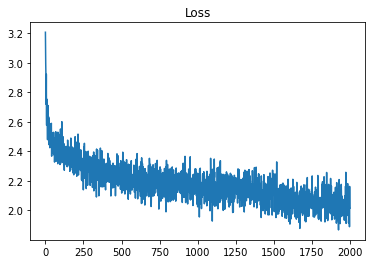

In [6]:
def my_schedule(step):
    return 0.1 if step < 15000 else 0.01

history = model.train(Xtr, Ytr, episodes= 20000, ls = my_schedule)

plt.plot(torch.tensor(history).view(-1, 10).mean(1))
plt.title('Loss')
plt.show()

In [7]:
model.split_loss(Xv, Yv)

2.0664737224578857

In [8]:
for c in chars[1:]:
    s = model.predict(f'.......{c}')
    print(f'Name starting with {c}: {s}')

Name starting with g: .......garmera.
Name starting with q: .......qynesten.
Name starting with t: .......toreas.
Name starting with e: .......eman.
Name starting with m: .......mseani.
Name starting with i: .......issan.
Name starting with l: .......lina.
Name starting with n: .......nasir.
Name starting with o: .......oustenson.
Name starting with v: .......vriskiell.
Name starting with y: .......yariuy.
Name starting with u: .......undon.
Name starting with c: .......cragenna.
Name starting with f: .......fuxtonu.
Name starting with p: .......payviro.
Name starting with w: .......wazelien.
Name starting with z: .......zahira.
Name starting with j: .......janbel.
Name starting with r: .......rosyand.
Name starting with k: .......kamarisha.
Name starting with b: .......brieston.
Name starting with h: .......holan.
Name starting with x: .......xannaton.
Name starting with s: .......sujav.
Name starting with d: .......dillionna.
Name starting with a: .......abdry.


In [9]:
model.predict('........')

'........beniki.'